# To collect the data we have 2 Option

# 1.Web scraping


In [ ]:
import tweepy as tw#to access the twitter api
import numpy as np
import pandas as pd #for basic data operations
from matplotlib import pyplot as plt 

In [ ]:
# Importing the keys from twitter api
consumerKey = "z7pOO13KR8MKpDVKqapIBoTTl"
consumerSecret = "bcijZnbSYLBioqCt0MQpTv0BiYIi6PPJNy5iwgshHnazwQx1Eu"
accessToken = "875389204934668288-AJtoVyVdum2hV3SZ6oFq5XUp2u9wb4y"
accessTokenSecret = "Mu51cwghGFZqtDAtoQlDCe1TX0hs5r59EvEFIwFGdNpzF"

In [ ]:
# Establish the connection with twitter API
auth = tw.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tw.API(auth,wait_on_rate_limit=True)

In [ ]:
hastag='#stockmarket'
query=tw.Cursor(api.search_tweets,q=hastag).items(1500)
tweets=[{'Tweers':tweet.text} for tweet in query]
print(tweets)

In [ ]:
df=pd.DataFrame.from_dict(tweets)

In [ ]:
# The scrap data is save to twitter_scrap1500.csv file
df.to_csv("twitter_scrap1500.csv")

# 2. Download the Dataset from kaggle

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('train_tweet.csv')


In [3]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [4]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
df.shape

(31962, 3)

In [7]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [10]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prasantpoudel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string

In [12]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    # removing special characters
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    # removing the stops words
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    # steamming the word
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [13]:
df['transform_tweet']=df['tweet'].apply(transform_text)

In [14]:
df

,id,label,tweet,transform_tweet
0,1,0,@user when a father is dysfunctional and is s...,user father dysfunct selfish drag kid dysfunct...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thank lyft credit ca use caus offer ...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,model love u take u time
4,5,0,factsguide: society now #motivation,factsguid societi motiv
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate user isz youuu
31958,31959,0,to see nina turner on the airwaves trying to...,see nina turner airwav tri wrap mantl genuin h...
31959,31960,0,listening to sad songs on a monday morning otw...,listen sad song monday morn otw work sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",user sikh templ vandalis calgari wso condemn act


In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc=WordCloud(width=500,height=500,min_font_size=1,background_color='white')

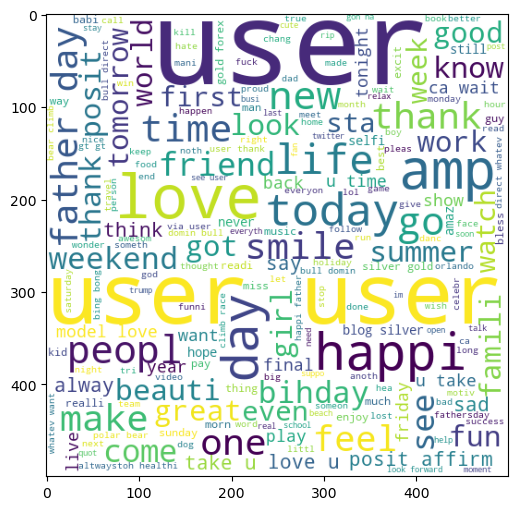

In [18]:
pos_wc=wc.generate(df[df['label']==0]['transform_tweet'].str.cat(sep=" "))
plt.figure(figsize=(18,6))
plt.imshow(pos_wc)

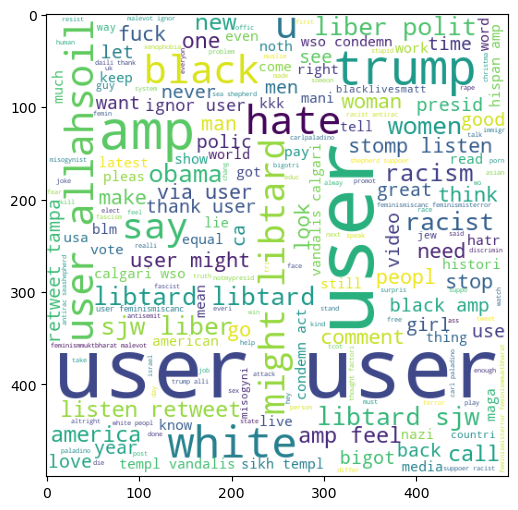

In [19]:
neg_wc=wc.generate(df[df['label']==1]['transform_tweet'].str.cat(sep=" "))
plt.figure(figsize=(18,6))
plt.imshow(neg_wc)

In [20]:
x=df.transform_tweet
y=df.label

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer

In [23]:
my_tags=['negative','positive']


In [24]:
nb = Pipeline([('vect', TfidfVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(x_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.939514026488685
              precision    recall  f1-score   support

    negative       0.94      1.00      0.97      8910
    positive       1.00      0.15      0.25       679

    accuracy                           0.94      9589
   macro avg       0.97      0.57      0.61      9589
weighted avg       0.94      0.94      0.92      9589



In [25]:
sgd = Pipeline([('vect', TfidfVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.9317968505579309
              precision    recall  f1-score   support

    negative       0.93      1.00      0.96      8910
    positive       1.00      0.04      0.07       679

    accuracy                           0.93      9589
   macro avg       0.97      0.52      0.52      9589
weighted avg       0.94      0.93      0.90      9589



In [26]:
randrf = Pipeline([('vect', TfidfVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier()),
                   ])
randrf.fit(x_train, y_train)
y_pred =randrf.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.9583898216706643
              precision    recall  f1-score   support

    negative       0.96      1.00      0.98      8910
    positive       0.90      0.46      0.61       679

    accuracy                           0.96      9589
   macro avg       0.93      0.73      0.79      9589
weighted avg       0.96      0.96      0.95      9589



In [27]:
import pickle
pickle.dump(randrf,open('model.pkl','wb'))

In [28]:
rand = Pipeline([('vect', TfidfVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf',DecisionTreeClassifier()),
               ])
rand.fit(x_train, y_train)
y_pred =rand.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.941599749713213
              precision    recall  f1-score   support

    negative       0.97      0.97      0.97      8910
    positive       0.60      0.54      0.57       679

    accuracy                           0.94      9589
   macro avg       0.78      0.76      0.77      9589
weighted avg       0.94      0.94      0.94      9589



In [29]:
rand = Pipeline([('vect', TfidfVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf',KNeighborsClassifier()),
               ])
rand.fit(x_train, y_train)



y_pred =rand.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.9315882782354782


In [30]:
rand = Pipeline([('vect', TfidfVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf',AdaBoostClassifier()),
               ])
rand.fit(x_train, y_train)



y_pred =rand.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.944936906872458
              precision    recall  f1-score   support

    negative       0.95      0.99      0.97      8910
    positive       0.75      0.34      0.46       679

    accuracy                           0.94      9589
   macro avg       0.85      0.66      0.72      9589
weighted avg       0.94      0.94      0.94      9589



In [31]:
rand = Pipeline([('vect', TfidfVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf',BaggingClassifier()),
               ])
rand.fit(x_train, y_train)
y_pred =rand.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.9543226613828345
              precision    recall  f1-score   support

    negative       0.96      0.99      0.98      8910
    positive       0.77      0.51      0.61       679

    accuracy                           0.95      9589
   macro avg       0.87      0.75      0.79      9589
weighted avg       0.95      0.95      0.95      9589



among all the model RandomForest is giving higher accuracy so we will use this model for deployment

# Deep Learning

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf=TfidfVectorizer()
tfidf=TfidfVectorizer(max_features=300)
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [33]:
x=tfidf.fit_transform(df['transform_tweet']).toarray()
y=df['label'].values

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

In [36]:
classifier=Sequential()
classifier.add(Dense(units=1,activation='relu'))
classifier.add(Dense(units=64,activation='relu'))
classifier.add(Dense(units=32,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Metal device set to: Apple M1


2022-09-23 19:29:26.816140: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-23 19:29:26.816463: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [37]:
callback=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [38]:
classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=50,callbacks=[callback])

Epoch 1/50


2022-09-23 19:29:26.947846: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-23 19:29:27.441751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1928/1928 [==============================] - ETA: 0s - loss: 0.2153 - accuracy: 0.9319

2022-09-23 19:29:40.664972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1928/1928 [==============================] - 17s 8ms/step - loss: 0.2153 - accuracy: 0.9319 - val_loss: 0.1844 - val_accuracy: 0.9383
Epoch 2/50
1928/1928 [==============================] - 16s 8ms/step - loss: 0.1691 - accuracy: 0.9401 - val_loss: 0.1806 - val_accuracy: 0.9399
